In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_1 = pd.read_csv("heat_data_fig_1.csv").set_index("Country")
df_2 = pd.read_csv("heat_data_fig_2.csv").set_index("Country")

In [ ]:
df_2

In [ ]:
df_1.loc["Canada"].values
labels_1 = df_1.columns[:-1]
labels_2 = df_2.columns[:-1]
labels_2

In [ ]:
for country in df_1.index:
    plt.figure(figsize=(14,14))
    colors = sns.color_palette("tab10")
    plt.pie(df_1.loc[country][:-1], labels=labels_1, colors=colors, startangle=90, autopct='%.0f%%', textprops={'fontsize': 14})
    plt.title(f'Heating fuel source baseline: {country}', fontdict={'fontsize': 20})
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.savefig(f"Exported/{country}_figure_1")
    plt.show()

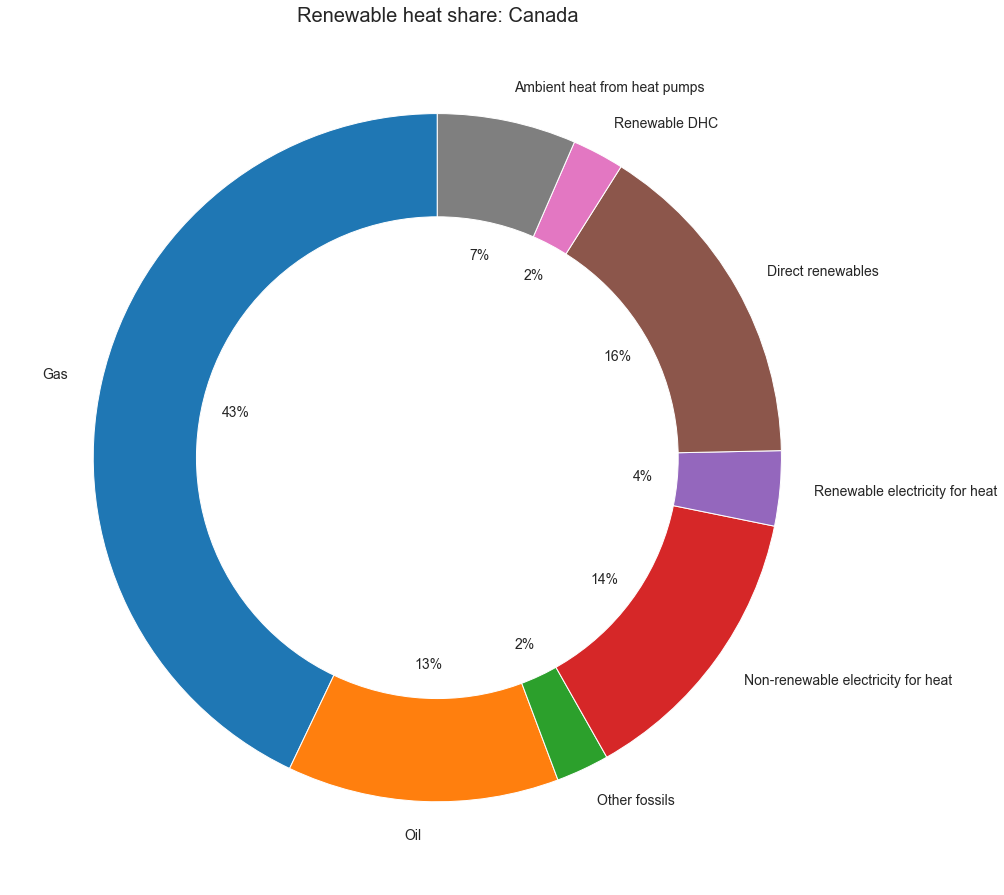

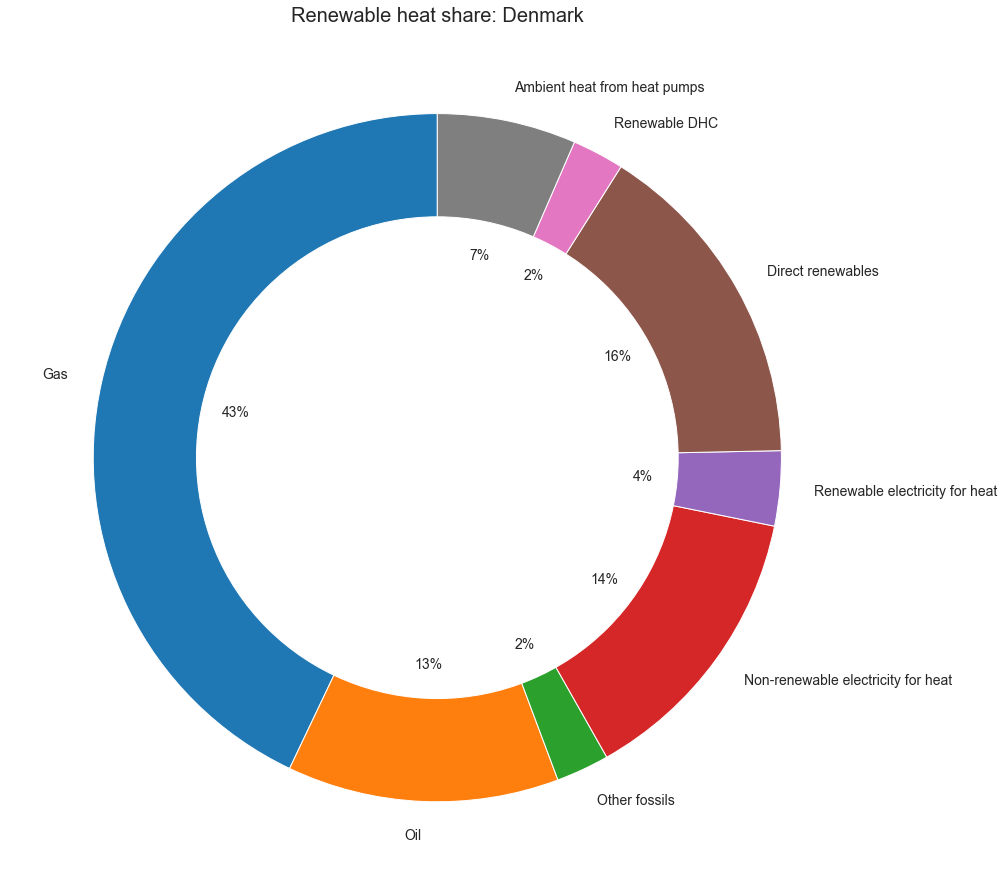

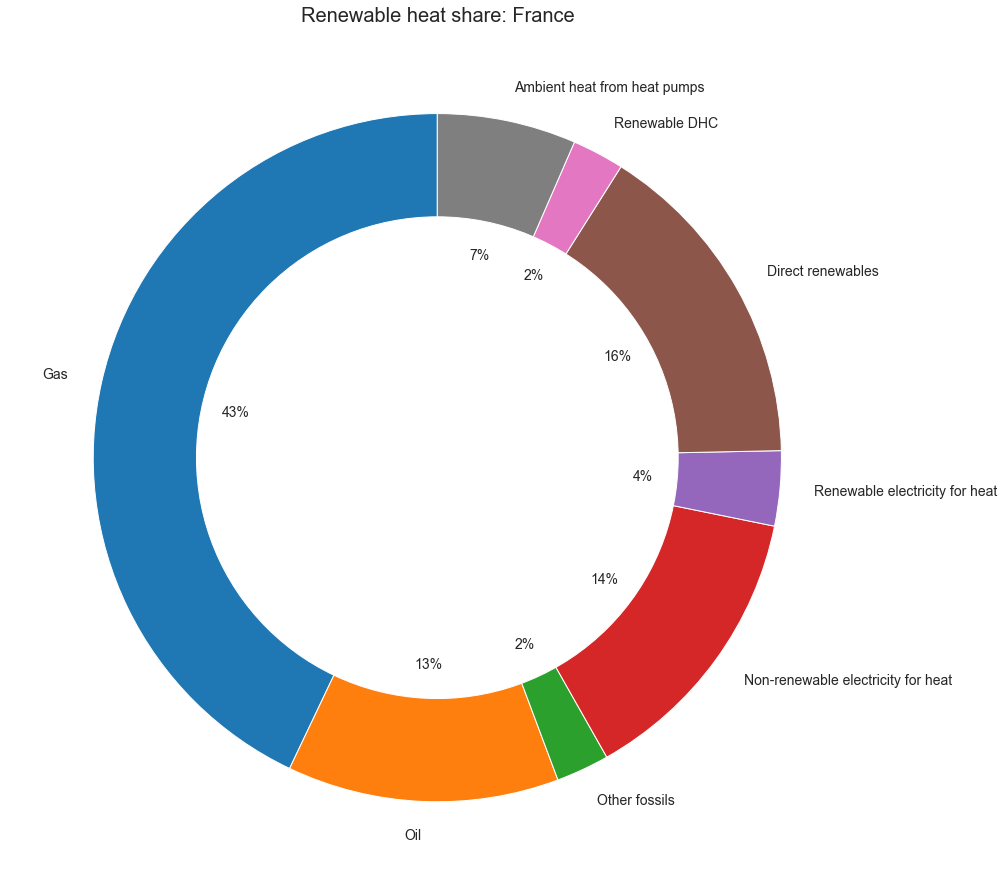

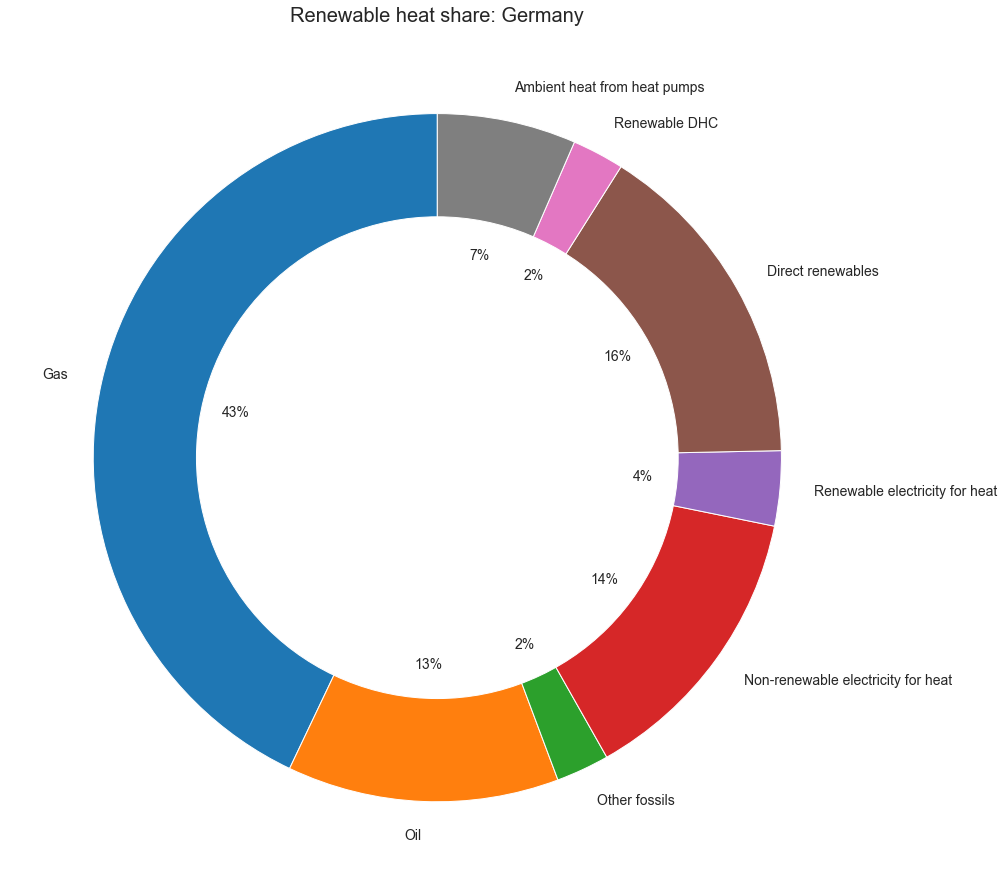

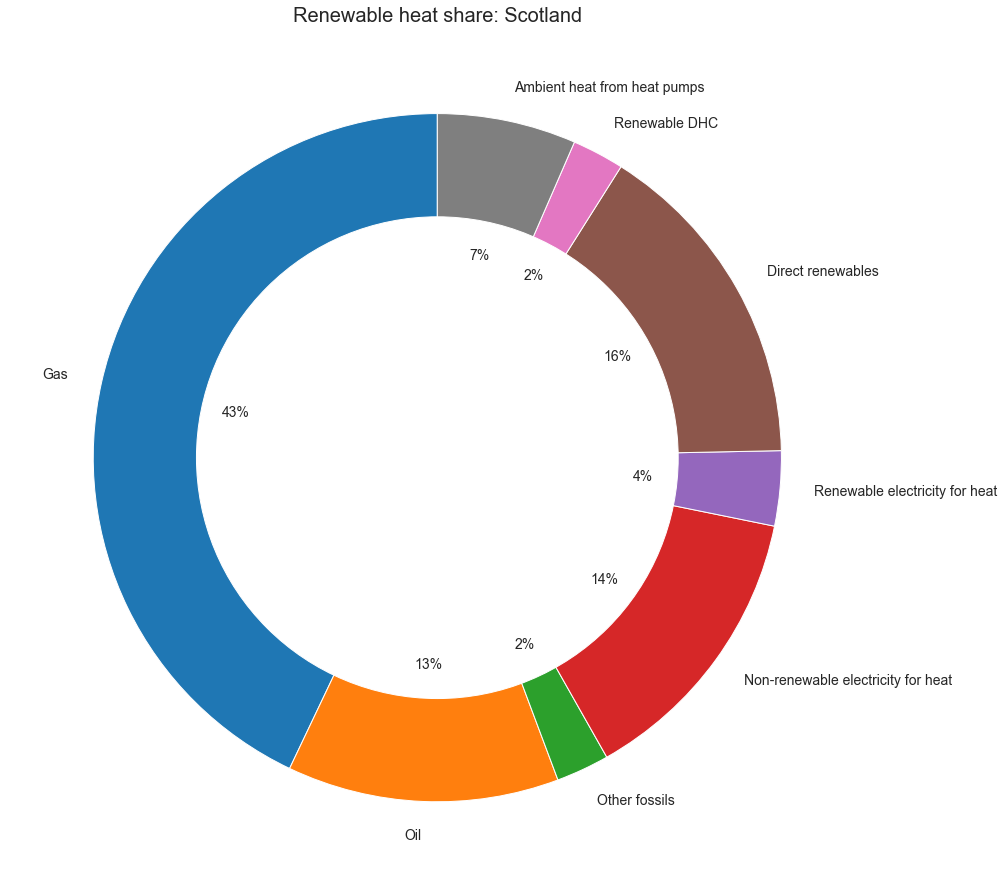

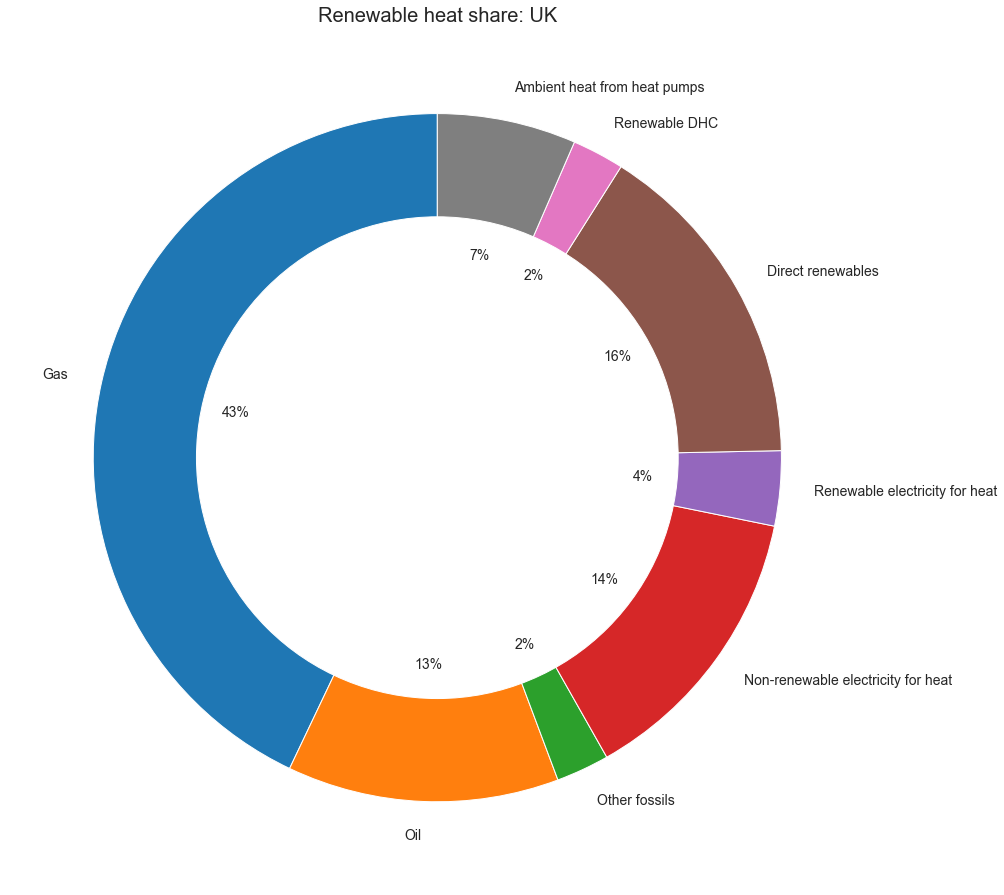

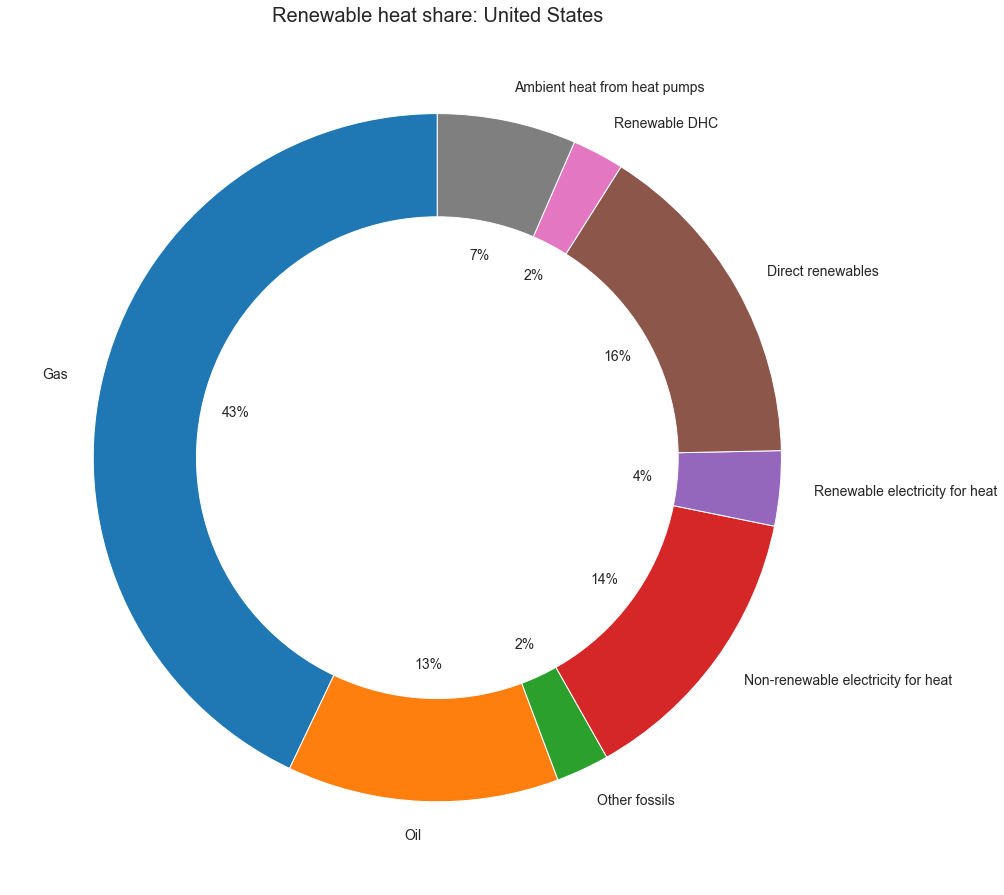

In [96]:
for country in df_2.index:
    plt.figure(figsize=(14,14))
    colors = sns.color_palette("tab10")
    plt.pie(df_2.loc["France"][:-1], labels=labels_2, colors=colors, startangle=90, autopct='%.0f%%', textprops={'fontsize': 14})
    plt.title(f'Renewable heat share: {country}', fontdict={'fontsize': 20})
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.tight_layout()
    plt.savefig(f"Exported/{country}_figure_2")
    plt.show()